In [29]:
import librosa
import os
import keras
import numpy as np
import matplotlib.pyplot as plt
import math

In [30]:
model_path = 'BirdNET-Analyzer/checkpoints/V2.3/BirdNET_GLOBAL_3K_V2.3_Model'
model = keras.models.load_model(model_path, compile=False).model

In [31]:
#audio_path = 'BirdNET-Analyzer/example/soundscape.wav'
#audio_path = 'Merlin/2023-03-31 13_17.wav'
audio_path = 'kaggle-data/train/7e0d06929.flac'
sig, _ = librosa.load(audio_path, 
            sr=48000, mono=True, res_type='kaiser_fast')
chunk_length = 3*48000
nchunks = len(sig) // chunk_length
chunks = sig[:nchunks*chunk_length].reshape(nchunks, chunk_length)

In [32]:
prediction = model.predict(chunks)

1/1 [==============================] - 2s 2s/step


In [28]:
def flat_sigmoid(x, sensitivity=-1):
    return 1 / (1.0 + np.exp(sensitivity * np.clip(x, -15, 15)))

label_path = 'BirdNET-Analyzer/checkpoints/V2.3/BirdNET_GLOBAL_3K_V2.3_Labels.txt'
with open(label_path) as f:
    labels = [l.replace('\n', '') for l in f.readlines()]

for p in prediction:
    p_labels = list(zip(labels, p))
    p_labels.sort(key = lambda x: x[1], reverse = True)
    print([(b.split('_')[1], math.floor(flat_sigmoid(p)*100)) for b, p in p_labels if flat_sigmoid(p) >= 0.1])

[]
[]
[]
[]
[('Pileated Woodpecker', 11)]
[]
[]
[]
[]
[]
[]
[('Human vocal', 12)]
[]
[]
[]
[]
[]
[]
[]
[]


In [21]:
list(zip(labels, prediction[15]))

[('Abroscopus albogularis_Rufous-faced Warbler', -10.456357),
 ('Abroscopus superciliaris_Yellow-bellied Warbler', -11.342573),
 ('Aburria aburri_Wattled Guan', -7.2338386),
 ('Acanthagenys rufogularis_Spiny-cheeked Honeyeater', -9.871946),
 ('Acanthis cabaret_Lesser Redpoll', -10.164377),
 ('Acanthis flammea_Common Redpoll', -8.554074),
 ('Acanthis hornemanni_Hoary Redpoll', -11.069009),
 ('Acanthiza chrysorrhoa_Yellow-rumped Thornbill', -13.261287),
 ('Acanthiza ewingii_Tasmanian Thornbill', -10.458279),
 ('Acanthiza pusilla_Brown Thornbill', -7.8563485),
 ('Acanthiza reguloides_Buff-rumped Thornbill', -10.530773),
 ('Acanthorhynchus tenuirostris_Eastern Spinebill', -10.134302),
 ('Accipiter badius_Shikra', -8.73669),
 ('Accipiter bicolor_Bicolored Hawk', -9.607777),
 ("Accipiter cooperii_Cooper's Hawk", -7.4946303),
 ('Accipiter fasciatus_Brown Goshawk', -11.337656),
 ('Accipiter gentilis_Northern Goshawk', -8.276105),
 ('Accipiter nisus_Eurasian Sparrowhawk', -8.251437),
 ('Accipit

In [7]:
intermediate_model = keras.Model(inputs = model.input, outputs = model.get_layer('MEL_SPEC').output)
spec = intermediate_model.predict(chunks)

1/1 [==============================] - 0s 231ms/step


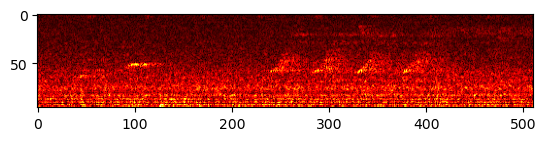

In [11]:
plt.imshow(spec[14,:], cmap='hot')

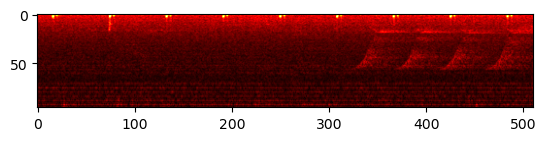

In [19]:
spec2 = librosa.feature.melspectrogram(y = sig, sr = 48000, 
    fmin=150, fmax=15000, n_fft=1024, hop_length=280, n_mels=96, norm=100.0, power=0.5)
plt.imshow(spec2[::-1,16*511:17*511], cmap='hot')

In [36]:
all_but_last_layer = keras.Model(inputs = model.input, outputs = model.get_layer('CONCAT_DO').output)
embedding = all_but_last_layer.predict(chunks)

1/1 [==============================] - 2s 2s/step


In [40]:
embedding[0]

array([0.10368829, 0.5482823 , 0.11275378, ..., 0.31869996, 0.14428426,
       0.7710392 ], dtype=float32)